Let's start by importing data about parks

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

df = pd.read_csv("parksdata.csv")
df.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


We see a lot of unneeded data here so we can simplify it.

In [28]:
df[["name", "type", "neighborhood"]]


,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore
...,...,...,...
204,Woods Run Park,Park,Marshall-Shadeland
205,Young Field Park,Park,Marshall-Shadeland
206,Zulema Park,Park,Central Oakland
207,Liberty Green Park,Park,East Liberty


Now we will filter the data even more to make sure we are looking at parks and we will look at each neighborhood and how many parks they have. 

In [30]:
parks_only_df = df[df['type'] == 'Park']

neighborhood_counts = parks_only_df['neighborhood'].value_counts()

top_fifty_neighborhoods = neighborhood_counts.head(51)


top_park_neighborhoods = pd.DataFrame(top_fifty_neighborhoods)
top_park_neighborhoods.reset_index(inplace=True)
top_park_neighborhoods.columns = ['Neighborhood', 'Park Count']
top_park_neighborhoods

,Neighborhood,Park Count
0,Beechview,6
1,South Side Slopes,6
2,Troy Hill,5
3,Hazelwood,5
4,Mount Washington,5
5,Elliott,4
6,Sheraden,4
7,Marshall-Shadeland,4
8,East Liberty,4
9,Brighton Heights,3


Lets put this data in a bar plot so its easier to read and look at the top ten neighborhoods from the list.

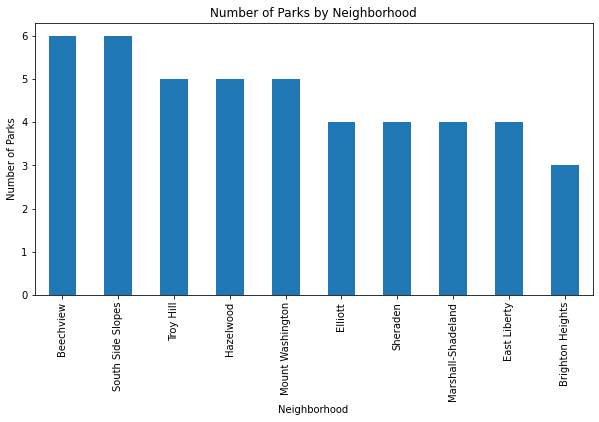

In [31]:
data = {'Beechview': 6, 'South Side Slopes': 6, 'Troy Hill': 5, 'Hazelwood': 5,
        'Mount Washington': 5, 'Elliott': 4, 'Sheraden': 4, 'Marshall-Shadeland': 4,
        'East Liberty': 4, 'Brighton Heights': 3}

parks = pd.Series(data)

parks.plot(kind='bar', figsize=(10,5))
plt.title('Number of Parks by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.show()

Now we will load in data from arrests

In [33]:
df2 = pd.read_csv("arrests.csv")
df2.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


Again, there is a lot of unneeded data so we can simplify it.

In [34]:
df2[["ARRESTLOCATION", "INCIDENTNEIGHBORHOOD"]]

,ARRESTLOCATION,INCIDENTNEIGHBORHOOD
0,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield
1,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City
2,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood
3,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny
4,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights
...,...,...
61371,"900 Block 2nd AV Pittsburgh, PA 15219",Larimer
61372,"2000 Block Centre AV Pittsburgh, PA 15219",Crawford-Roberts
61373,"East Liberty BL & Mellon ST Pittsburgh, PA 15206",East Liberty
61374,"S Bouquet ST & Dawson ST Pittsburgh, PA 15213",Central Oakland


Now we will go through both data sets and make sure that we are only looking at arrests in neighborhoods that contain parks.

In [8]:
neighborhoods1 = set(df['neighborhood'])
neighborhoods2 = set(df2['INCIDENTNEIGHBORHOOD'])

common_neighborhoods = neighborhoods1.intersection(neighborhoods2)



new_arrests = df2[df2['INCIDENTNEIGHBORHOOD'].isin(common_neighborhoods)]

common_neighborhoods = list(common_neighborhoods)
common_neighborhoods.sort()

df_common_neighborhoods = pd.DataFrame({'Common Neighborhoods': common_neighborhoods})

df_common_neighborhoods.head(73)

,Common Neighborhoods
0,Allegheny Center
1,Allentown
2,Arlington
3,Banksville
4,Bedford Dwellings
...,...
68,Upper Lawrenceville
69,West End
70,West Oakland
71,Westwood


Now we can get the neighborhoods with the least amount of arrests.

In [15]:


counted_arrests = new_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
top_fifty_neighborhoods = counted_arrests.nsmallest(51)

df3 = pd.DataFrame({'Neighborhood': top_fifty_neighborhoods.index, 'Arrest Count': top_fifty_neighborhoods.values})

df3.head(51)

,Neighborhood,Arrest Count
0,Central Northside,23
1,Regent Square,35
2,New Homestead,39
3,Swisshelm Park,40
4,East Carnegie,48
5,Oakwood,79
6,Hays,106
7,Fairywood,112
8,Windgap,115
9,Polish Hill,153


To make the data easier to read we can make another bar plot.

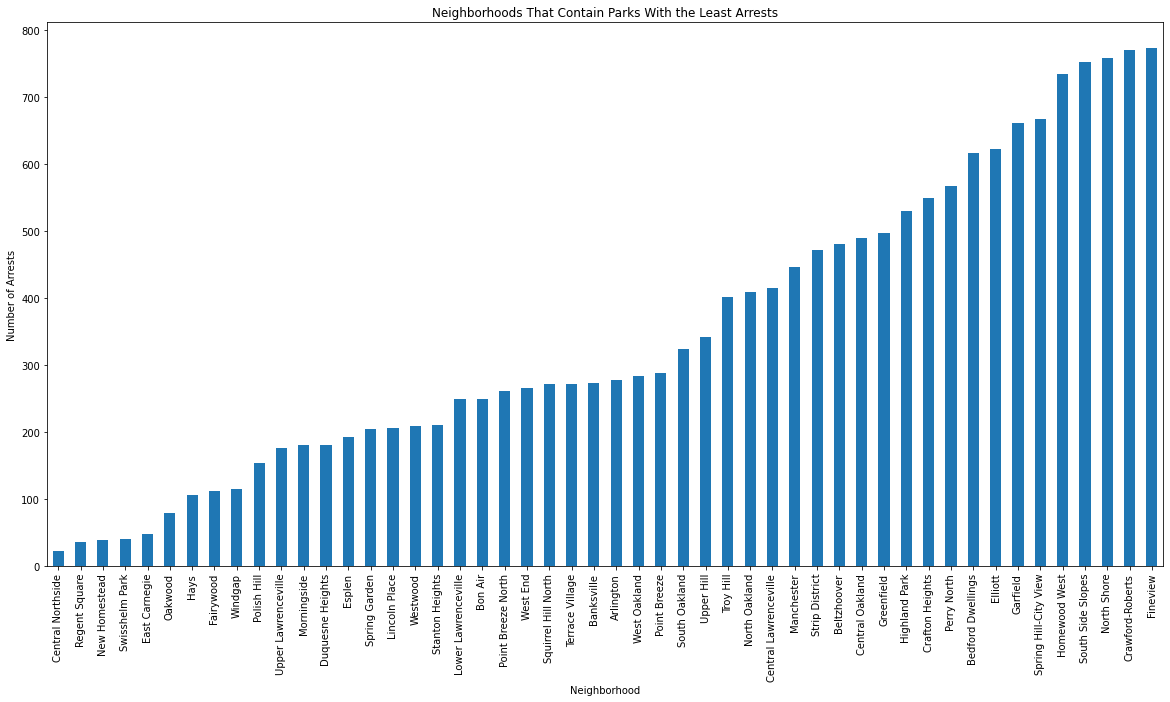

In [10]:
top_fifty_neighborhoods.plot(kind='bar', figsize=(20,10))
plt.title('Neighborhoods That Contain Parks With the Least Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.show()

Finally we will search through and find the neighborhood with the most amount of parks and least amount of arrests.

In [26]:
parks_only_df = df[df['type'] == 'Park']
neighborhood_counts = parks_only_df['neighborhood'].value_counts()
top_park_neighborhoods = neighborhood_counts.head(51).index.tolist()


counted_arrests = new_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
top_arrest_neighborhoods = counted_arrests.nsmallest(51).index.tolist()


neighborhoods = list(set(top_park_neighborhoods) & set(top_arrest_neighborhoods))


max_parks = 0
min_arrests = float('inf')
chosen_neighborhood = ""
for neighborhood in neighborhoods:
    park_count = parks_only_df[parks_only_df['neighborhood'] == neighborhood].shape[0]
    arrest_count = new_arrests[new_arrests['INCIDENTNEIGHBORHOOD'] == neighborhood].shape[0]
    if park_count > max_parks and arrest_count < min_arrests:
        max_parks = park_count
        min_arrests = arrest_count
        chosen_neighborhood = neighborhood

print("The neighborhood with the most parks but least arrests is:", chosen_neighborhood)

The neighborhood with the most parks but least arrests is: South Oakland


In conclusion we can assume that South Oakland is both the healthiest and safest neighborhood. 